# **Image Similarity Comparison Using Graph-Based methods with traditional similarity metrics**

**Importing necessary libraries**

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio

**Dividing images into patches and make a fully connected graph of each image** (There will be an edge between each patch of image to the other patch)

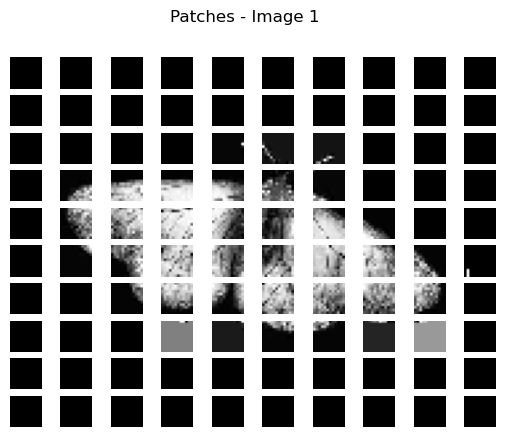

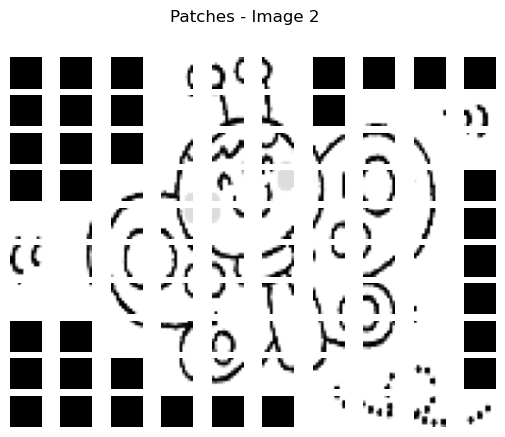

In [15]:
def divide_image_into_patches(image, num_patches):
    height, width = image.shape[:2]
    patch_height = height // num_patches
    patch_width = width // num_patches
    patches = []
    for i in range(num_patches):
        for j in range(num_patches):
            patch = image[i*patch_height:(i+1)*patch_height, j*patch_width:(j+1)*patch_width]
            patches.append(patch)
    return patches


image1_path = "img1.jpg"
image2_path = "img2.jpeg"
image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Resize both images to 16x16
image1_resized = cv2.resize(image1, (120, 120))
image2_resized = cv2.resize(image2, (120, 120))

# Take input from the user to select the number of patches
num_patches = int(input("Enter the number of patches: "))

# Divide each image into the specified number of patches
patches_image1 = divide_image_into_patches(image1_resized, num_patches)
patches_image2 = divide_image_into_patches(image2_resized, num_patches)

# Display the patches using Matplotlib
for i, patch in enumerate(patches_image1):
    plt.subplot(num_patches, num_patches, i+1)
    plt.imshow(patch, cmap='gray')
    plt.axis('off')
plt.suptitle('Patches - Image 1')
plt.show()

for i, patch in enumerate(patches_image2):
    plt.subplot(num_patches, num_patches, i+1)
    plt.imshow(patch, cmap='gray')
    plt.axis('off')
plt.suptitle('Patches - Image 2')
plt.show()



In [16]:
def compute_mean_intensity(patches):
    mean_intensity_values = []
    for patch in patches:
        mean_intensity = np.mean(patch)
        mean_intensity_values.append(mean_intensity)
    return mean_intensity_values

def compute_edges(patches):
    num_patches = len(patches)
    edges = np.zeros((num_patches, num_patches))
    mean_intensity_values = compute_mean_intensity(patches)
    for i in range(num_patches):
        for j in range(num_patches):
            diff = abs(mean_intensity_values[i] - mean_intensity_values[j])
            edges[i, j] = diff
    return edges
def cosine_similarity_between_matrices(matrix1, matrix2):
    matrix1 = matrix1.flatten().reshape(1, -1)  # Flatten and reshape to ensure it's a row vector
    matrix2 = matrix2.flatten().reshape(1, -1)  # Flatten and reshape to ensure it's a row vector
    similarity = cosine_similarity(matrix1, matrix2)
    return similarity[0][0]

**Results**

In [17]:
def calculate_metrics(image1, image2):
    # SSIM
    start_time = time.time()
    ssim_index, _ = ssim(image1, image2, full=True)
    ssim_time = time.time() - start_time
    
    # RMSE
    start_time = time.time()
    rmse = np.sqrt(mean_squared_error(image1, image2))
    rmse_time = time.time() - start_time
    
    # PSNR
    start_time = time.time()
    psnr = peak_signal_noise_ratio(image1, image2)
    psnr_time = time.time() - start_time
    
    # ISSM (Image Structural Similarity Measure)
    start_time = time.time()
    issm = 1 - ssim_index
    issm_time = time.time() - start_time

    # Graph based cosine similarity
    start_time = time.time()

    edges_image1 = np.array(compute_edges(patches_image1))
    edges_image2 = np.array(compute_edges(patches_image2))

    # Calculate Graph Edit Distance
    ged = cosine_similarity_between_matrices(edges_image1, edges_image1)

    graph_end_time = time.time() - start_time

    return ssim_index, rmse, psnr, issm, ged, ssim_time, rmse_time, psnr_time, issm_time, graph_end_time


# Calculate metrics
ssim_index, rmse, psnr, issm, ged, ssim_time, rmse_time, psnr_time, issm_time , graph_end_time= calculate_metrics(image1_resized, image2_resized)

# Print results
print("Structural Similarity Index (SSIM):", ssim_index)
print("Root Mean Square Error (RMSE):", rmse)
print("Peak Signal-to-Noise Ratio (PSNR):", psnr)
print("Image Structural Similarity Measure (ISSM):", issm)
print("Graph based Cosine similarity:", ged)


# Print times
print("\nTime taken for each algorithm:")
print("SSIM Time:", ssim_time, "seconds")
print("RMSE Time:", rmse_time, "seconds")
print("PSNR Time:", psnr_time, "seconds")
print("ISSM Time:", issm_time, "seconds")
print("Graph based Cosine similarity Time:", graph_end_time, "seconds")


print("Graph Method Time:", graph_end_time)

Structural Similarity Index (SSIM): 0.01138052929677652
Root Mean Square Error (RMSE): 222.40602572272581
Peak Signal-to-Noise Ratio (PSNR): 1.1878726175040497
Image Structural Similarity Measure (ISSM): 0.9886194707032234
Graph based Cosine similarity: 0.9999999999999972

Time taken for each algorithm:
SSIM Time: 0.003396272659301758 seconds
RMSE Time: 0.0 seconds
PSNR Time: 0.0 seconds
ISSM Time: 0.0 seconds
Graph based Cosine similarity Time: 0.011644840240478516 seconds
Graph Method Time: 0.011644840240478516
